<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.12

Reconsider the tree problem of Example 5.1.

Relembrando o Exemplo 5.1.
> **Example 5.1** Reconsider the tree problem of Example 4.1.  Assume that hardwoods grow at a rate of 10% per year and softwoods at a rate of 25% per year. An acre of forest land can support about 10,000 tons of hardwoods or 6,000 tons of softwoods. The extent of competition has not been numerically determined. Can both types of trees coexist in stable equilibrium?

Relembrando Exemplo 4.1
> **Example 4.1** In an unmanaged tract of forest area, hardwood and softwood trees compete for the available land and water. The more desirable hardwood trees grow more slowly, but are more durable and produce more valuable timber. Softwood trees compete with the hardwoods by growing rapidly and consuming the available water and soil nutrients. Hardwoods compete by growing taller than the softwoods can and shading new seedlings. They are also more resistant to disease.  Can these two types of trees coexist on one tract of forest land indefinitely, or will one type of tree drive the other to extinction?

### a) Determine how long it will take for both hardwoods and softwoods to grow to $90\%$ of their stable equilibrium levels. Assume an initial population of $1{,}500$ tons/acre of softwood trees and $100$ tons/acre of hardwoods. This is the situation in which we are trying to introduce a new type of more valuable tree into an existing ecosystem. Assume $b_i=a_i/2$, and use the simple simulation technique introduced in Section 6.2.

Dado que $b_i= \frac{a_i}{2}$, temos as mesmas equações para o modelo apresentadas no Exemplo 5.1:

In [ ]:
def equacoes(x1, x2):
    return (
        0.10*x1 - (0.10/10_000)*x1**2 - (0.05/10_000)*x1*x2,
        0.25*x2 - (0.25/6_000)*x2**2 - (0.125/6_000)*x1*x2
    )

x1, x2 = var('x1 x2', real=True)

dFdx1, dFdx2 = equacoes(x1, x2)

Math(f"""
\\begin{{aligned}}
\\frac{{dx_1}}{{dt}} &= {latex(dFdx1)} \\\\
\\frac{{dx_2}}{{dt}} &= {latex(dFdx2)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Pela técnica de simulação da Seção 6.2, uma $i$-ésima variável $x_{i,{t+1}}$ no tempo $t+1$ assume o valor de $x_{i,{t}} + f_{i}(\boldsymbol{x})$:
\begin{aligned}
x_{i,{k+1}} = x_{i,{k}} + f_{i}(\boldsymbol{x}_t),
\end{aligned}
sendo
 * $x_{i,{t}}$: $i$-ésima variável, no tempo anterior a $t+1$, ou seja, no tempo $t$;
 * $f_{i}(\boldsymbol{x}_t)$: $i$-ésima função, cujo a entrada corresponde a todas as variáveis no tempo $t$.
 
Nesta questão, temos as seguintes correspondências:
* $x_{1, t}$: população de árvores de madeira dura no $t$-ésimo ano;
* $x_{2, t}$: população de árvores de madeira macia no $t$-ésimo ano;
* $f_i(\boldsymbol{x}_t) = \frac{dx_i}{dt}$.

In [ ]:
def Simulacao(variaveis, valores_iniciais, funcoes, numero_iteracoes, eta=1e-4):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    x_[:, 0] = valores_iniciais

    estabilizou = np.zeros(num_variaveis, dtype=bool)

    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        valores = {k: v for k, v in zip(variaveis, x_k.flatten())}
        for i, (variavel, funcao) in enumerate(zip(variaveis, funcoes)):
            x_i = valores[variavel]
            x_i_next = x_i + N(funcao.subs(valores))
            x_[i, k+1] = x_i_next

            estabilizou[i] = abs(x_i - x_i_next) < eta

        if all(estabilizou):
            break

    return pd.DataFrame(x_.T[:k+2], columns=[str(v) for v in variaveis])

Realizemos a simulação para as populações iniciais definidas no enunciado:

In [ ]:
populacao_inicial_x1 = 100
populacao_inicial_x2 = 1_500

simulacao_a = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(populacao_inicial_x1, populacao_inicial_x2),
    funcoes=(dFdx1, dFdx2),
    numero_iteracoes=1000
)

O critério de parada utilizado para as simulações foi o seguinte:
* Pare se $|x_{i,t} - x_{i,t+1}| < 1\cdot10^{-4} ~\forall~ x_{i,t} \in \boldsymbol{x}_t, x_{i,t+1} \in \boldsymbol{x}_{t+1}$;
* Ou se $t=1000+1$.


Pegando os valores de $x_1$ e $x_2$ no final da simulação, temos os pontos de estabilidade. O índice (coluna mais a esquerda) indica o ano $t$ em que a simulação parou.

In [ ]:
simulacao_a[-1:]

,x1,x2
461,9333.331138,1333.336135


Comparando com a solução analítica encontrada no Exemplo 5.1, vemos que a aproximação é satisfatória.

**Solução obtida analiticamente**
* Ponto de equilíbrio: $(\frac{28{,}000}{3}, \frac{4{,}000}{3}) \approx (9333, 1333)$.

#### Determine how long it will take for both hardwoods and softwoods to grow to 90% of their stable equilibrium levels.

O Google tradutor traduziu o enunciado como
> Determine quanto tempo levará para que as madeiras duras e macias cresçam até 90% de seus níveis de equilíbrio estável.

Interpretamos que a questão pede o menor tempo $t$ quando **ambas as espécies atingem simultaneamente** o intervalo entre 90% e 110% da população no ponto de equilíbrio estável:

In [ ]:
resultado_a = simulacao_a.iloc[-1]
display(Math(f'''
\\text{{\\textbf{{Ponto estável:}}}} \\\\
x_1 = {resultado_a.x1} ~~
x_2 = {resultado_a.x2} \\\\
'''))
print()

display(Math(f'''
\\text{{\\textbf{{Tamanho populacional correspondendo a 90\\% do ponto estável:}}}} \\\\
x_1 \\text{{ entre }} {resultado_a.x1 * 0.9} \\text{{ e }} {resultado_a.x1 * 1.1} \\\\
x_2 \\text{{ entre }} {resultado_a.x2 * 0.9} \\text{{ e }} {resultado_a.x2 * 1.1}
'''))

simulacao_a_90 = simulacao_a.copy()
simulacao_a_90['90%<x1<110%'] = ((0.9*resultado_a.x1 <= simulacao_a.x1) & (simulacao_a.x1 <= 1.1*resultado_a.x1))
simulacao_a_90['90%<x2<110%'] = ((0.9*simulacao_a.x2 <= resultado_a.x2) & (resultado_a.x2 <= 1.1*resultado_a.x2))
simulacao_a_90['90% < x1, x2 <110%'] = simulacao_a_90['90%<x1<110%'] & simulacao_a_90['90%<x2<110%']

t_90 = simulacao_a_90[simulacao_a_90['90% < x1, x2 <110%'] == True].iloc[0].name

print()
Math(f'''
t_{{100\%}} = {latex(resultado_a.name)} \\\\
t_{{90\%}} = {latex(t_90)} \\\\
x_{{1, t={t_90}}} = {latex(simulacao_a.x1[t_90])} \\\\
x_{{2, t={t_90}}} = {latex(simulacao_a.x2[t_90])} \\\\
''')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como mostrado anteriormente, $t_{{100\%}}$, o tempo em que ambas as populações encontraram-se em um ponto estável e a similação parou, corresponde a

In [ ]:
Math(f'''t_{{100\%}} = {latex(resultado_a.name)}''')

<IPython.core.display.Math object>

Já para $t_{{90\%}}$, o ponto em que ambas as espécies atingem simultaneamente o intervalo entre 90% e 110% da população no ponto de equilíbrio estável é apresentado a seguir, incluindo a população encontrada nesse ponto.

In [ ]:
Math(f'''
t_{{90\%}} = {latex(t_90)} \\\\
x_{{1, t={t_90}}} = {latex(simulacao_a.x1[t_90])} \\\\
x_{{2, t={t_90}}} = {latex(simulacao_a.x2[t_90])}
''')

<IPython.core.display.Math object>

Para ter uma noção melhor, apresentemos o comportamento da simulação sobre o campo vetorial. Na figura abaixo, nós vemos:

* As setas azuis indicando o campo vetorial;
* A linha vermelha, apresentando o comportamento das populações durante a simulação até que chegassem no ponto estável;
* A bolinha branca de borda preta indicando o ponto estável;
* Uma região demarcada por duas linhas horizontais próximas ($x_2\approx 1200$ e $x_2\approx 1500$) indicando o intervalo em que $x_2$, a população de árvores de madeira macia, se encontraria entre 90% e 110% do ponto de equilíbrio estável;
* Uma região demarcada por duas linhas verticais próximas ($x_1\approx 8400$ e $x_1\approx 12000$) indicando o intervalo em que $x_1$, a população de árvores de madeira dura, se encontraria entre 90% e 110% do ponto de equilíbrio estável;
* Uma estrela amarela de borda preta indicando o ponto em que ambas as espécies atingem simultaneamente o intervalo entre 90% e 110% da população no ponto de equilíbrio estável. Observe que isto ocorre na interseção das duas regiões citadas acima.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


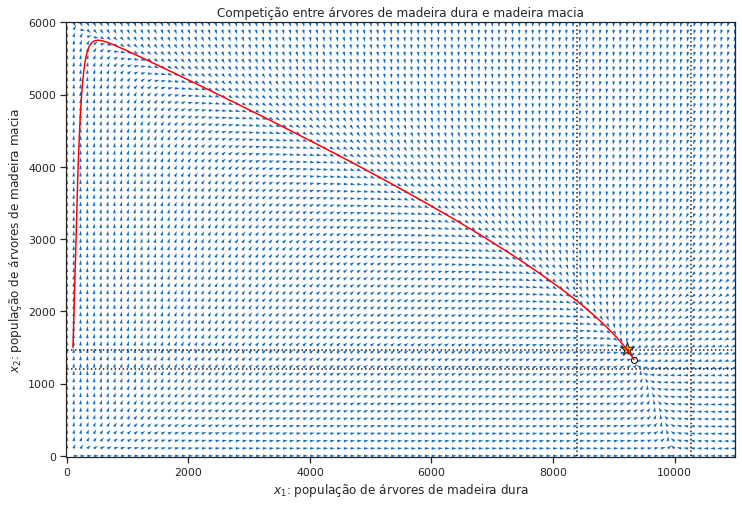

In [ ]:
#@title Código que gera o campo vetorial
def campo_vetorial(plots, cores, xlim, ylim, plot_campo_vetorial=True, legenda=None, solucoes=None):
    fig = plt.figure(figsize=(12, 8))

    if plot_campo_vetorial:
        sns.set_style("ticks")
        x1graf, x2graf = np.meshgrid(np.linspace(0, xlim[1], 100), np.linspace(0, ylim[1], 60))
        f1, f2 = equacoes(x1graf, x2graf)
        normalizador = np.sqrt(f1**2+f2**2)
        plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy', figure=fig)

    ax = plt.axes()
    ax.set_title("Competição entre árvores de madeira dura e madeira macia")
    ax.set_xlabel('$x_1$: população de árvores de madeira dura')
    ax.set_ylabel('$x_2$: população de árvores de madeira macia')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    
    for plot, cor in zip(plots, cores):
        ax.plot(*plot, color=cor,)

    plt.vlines(resultado_a.x1 * 0.9, 0, 10_000, linestyles ="dotted", colors ="k") 
    plt.vlines(resultado_a.x1 * 1.1, 0, 10_000, linestyles ="dotted", colors ="k")
    plt.hlines(resultado_a.x2 * 0.9, 0, 15_000, linestyles ="dotted", colors ="k") 
    plt.hlines(resultado_a.x2 * 1.1, 0, 15_000, linestyles ="dotted", colors ="k")

    if solucoes is not None:
        plt.scatter(solucoes[0], solucoes[1], marker='o', edgecolors='black', color='w')
        plt.scatter(simulacao_a.x1[t_90], simulacao_a.x2[t_90], marker='*', edgecolors='k', color='orange', s=200)
        

    if legenda is not None:
        plt.legend(legenda)

    plt.show();
    sns.set_theme()


campo_vetorial(
    [[simulacao_a.x1, simulacao_a.x2]],
    xlim=[-20, 11_000],
    ylim=[-20, 6_000],
    cores=['red'],
    solucoes=[resultado_a.x1, resultado_a.x2],
    #plot_campo_vetorial=False
)

Agora, no gráfico seguinte, vemos a população das espécies ao longo do tempo. A linha preta indica $t_{90\%}$.

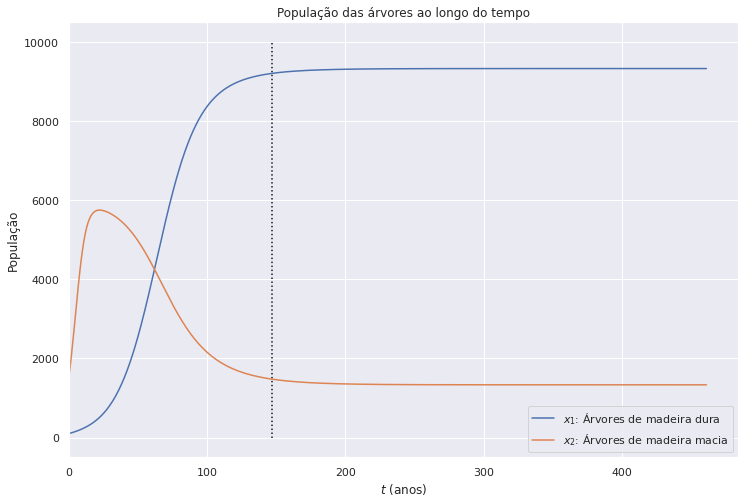

In [ ]:
ax = simulacao_a.plot(xlabel='$t$ (anos)', ylabel='População', title=f'População das árvores ao longo do tempo', figsize=(12, 8))
ax.set_xlim(left=0);
plt.legend(['$x_1$: Árvores de madeira dura', '$x_2$: Árvores de madeira macia'])
plt.vlines(t_90, 0, 10_000, linestyles ="dotted", colors ="k")

### b) Determine the point at which the biomass of hardwood trees is increasing at the fastest rate.
 
Encontrar o ponto em que a biomassa de árvores de madeira dura cresce na maior taxa corresponde a encontrar o $t$ no seguinte procedimento
$$
\text{arg max}_{t \in \mathcal{T}} \frac{x_{1,t+1} - x_{1,t}}{t+1-t},
$$
sendo $\mathcal{T}$ o conjunto de números inteiros que representam os anos da simulação e $\frac{x_{1,t+1} - x_{1,t}}{t+1-t}$ a taxa de variação de $x_1$ do tempo $t+1$ para com $t$.

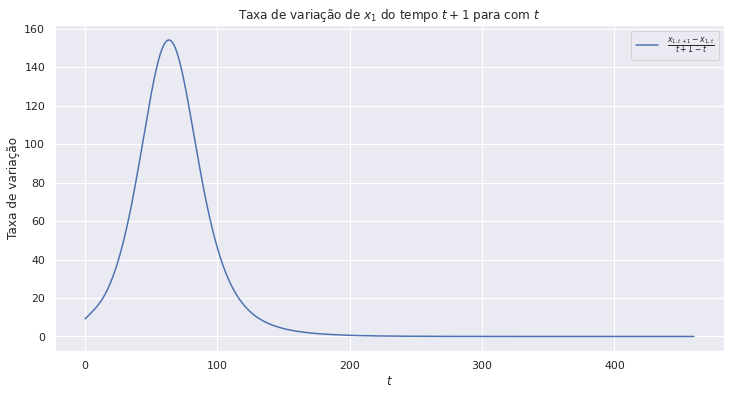

In [ ]:
x_1t = '$x_{1,t}$'
x_1tnext = '$x_{1,t+1}$'

solucao_b = pd.DataFrame({
    '$t$': range(len(simulacao_a.x1)-1),
    x_1t: simulacao_a.x1[:-1].to_numpy(),
    x_1tnext: simulacao_a.x1[1:].to_numpy()
})

solucao_b['$\\frac{x_{1,t+1} - x_{1,t}}{t+1-t}$'] = (solucao_b[x_1tnext] - solucao_b[x_1t])/1
solucao_b[['$\\frac{x_{1,t+1} - x_{1,t}}{t+1-t}$']]\
    .plot(
        title='Taxa de variação de $x_1$ do tempo $t+1$ para com $t$',
        xlabel='$t$',
        ylabel='Taxa de variação',
        figsize=(12, 6)
    )

No gráfico acima vemos a taxa de variação de $x_i$ entre $t$ e $t+1$ para toda a simulação. O ponto mais alto indica quando a taxa de crescimento foi maior.

In [ ]:
tempo_b = solucao_b['$\\frac{x_{1,t+1} - x_{1,t}}{t+1-t}$'].argmax()

display(Math(f"\\text{{Tempo $t$ em que há a maior taxa de crescimento de $x_{1}$ no tempo $t$ para $x_1$ no tempo $t+1$: }} \\\\ t={tempo_b}"))

<IPython.core.display.Math object>

E o momento em que ocorre a maior taxa de variação é entre $t$ e $t+1$ indicado na coluna mais a esquerda, em conjunto com a população de floresta de madeira dura e de madeira macia. Note que como a taxa corresponde a um intervalo, informamos então o intervalo:

In [ ]:
solucao_b = simulacao_a[tempo_b:tempo_b+2]
display(solucao_b)

Math(f"\\text{{Do tempo }} t={tempo_b} \\text{{ para o tempo }} t={tempo_b+1} \\text{{ a taxa de crescimento foi de }} {solucao_b.iloc[1]['x1'] - solucao_b.iloc[0]['x1']} \\text{{ tons/acre por ano}}")

,x1,x2
63,4407.21055,4186.962495
64,4561.43243,4118.825303


<IPython.core.display.Math object>

### c) Assuming that hardwoods are worth four times as much as softwoods in \\$/ton, determine the point at which the value of the forest stand (\\$/acre) is increasing at the fastest rate.
 
Encontrar o ponto em que o valor da floresta (\\$/acre) está aumentando na taxa mais rápida corresponde a encontrar o $t$ no seguinte procedimento
$$
\text{arg max}_{t \in \mathcal{T}} \frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}
$$
sendo $\mathcal{T}$ o conjunto de números inteiros que representam os anos da simulação e $\frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}$ a taxa de variação anual do valor da floresta entre o ano $t$ para $t+1$.

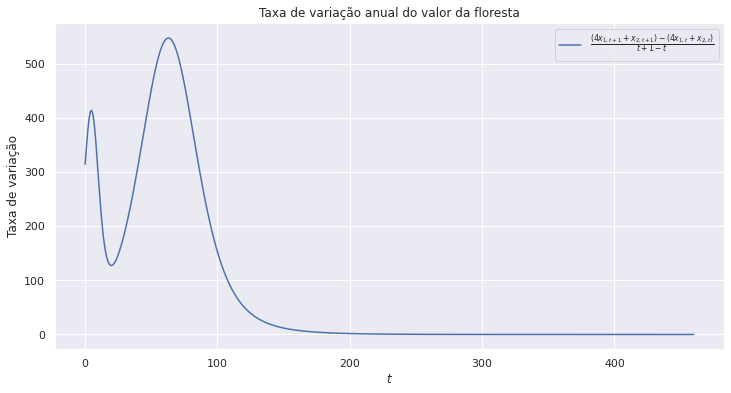

In [ ]:
solucao_c = (4*simulacao_a.x1 + simulacao_a.x2)[1:].to_numpy() - (4*simulacao_a.x1 + simulacao_a.x2)[:-1].to_numpy()
solucao_c = pd.DataFrame(solucao_c, columns=['$\\frac{(4x_{1,t+1} + x_{2,t+1}) - (4x_{1,t} + x_{2,t})}{t + 1 - t}$'])

solucao_c.plot(
    title='Taxa de variação anual do valor da floresta',
    xlabel='$t$',
    ylabel='Taxa de variação',
    figsize=(12, 6)
)

No gráfico acima, vemos a taxa de crescimento anual do valor da floresta entre $t$ e $t+1$ para toda a simulação. O ponto mais alto indica quando a taxa de crescimento foi maior.

O primeiro pico corresponde ao rápido crescimento da árvore de madeira macia dado a falta de competição entre as espécies pela quantidade inicial de árvores de madeira dura.

In [ ]:
tempo_c = solucao_c[solucao_c.columns[0]].argmax()

Math(f"\\text{{Tempo $t$ em que há a maior taxa de crescimento do valor da floresta de $t$ para $t+1$: }} \\\\ t={tempo_c}")

<IPython.core.display.Math object>

O momento em que ocorre a maior taxa de variação é entre $t$ e $t+1$ indicado na coluna mais a esquerda, em conjunto com a população de floresta de madeira dura e de madeira macia. Note que como a taxa corresponde a um intervalo, informamos então o intervalo:

In [ ]:
display(Math(f"\\text{{População }}"))
display(simulacao_a[tempo_c:tempo_c+2])

display(Math(f"\\text{{Valor da floresta }}"))

Math(f"\\text{{Do tempo }} t={tempo_c} \\text{{ para o tempo }} t={tempo_c+1} \\text{{ a taxa de crescimento do valor da floresta foi de }} {solucao_c.iloc[tempo_c].values[0]} \\text{{ em unidades de tons/acre por ano}}")

<IPython.core.display.Math object>

,x1,x2
63,4407.21055,4186.962495
64,4561.43243,4118.825303


<IPython.core.display.Math object>

<IPython.core.display.Math object>